<a href="https://colab.research.google.com/github/ben45123/AWS-Lambda-Research/blob/main/ProbelmSet04/Problem_Set_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 04 - Edge Detections
**Professor:** Dr. Christoforos Christoforou


## Exercise 1
Edge detection is one of the most important operations in Computer Vision. In this exercise we will investigate how it can be performed and what information can be obtained from it.

One of the ways to detect edges is to compute image intensity gradients. They can be approximated by convolving image with Sobel filters. They consist of 2 $3 \times 3$ filters:

\begin{equation*}
S_x = \frac{1}{8}
\begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1\\
\end{bmatrix}
\hspace{2cm}
S_y = \frac{1}{8}
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
+1 & +2 & +1\\
\end{bmatrix}
\end{equation*}

where $S_x$ computes the partial derivative of the image in the horizontal direction, while $S_y$ does it in the vertical direction.


**Exercise 1.1:**
* Load an image and convert it to gray scale (i.e. using the ```cv.cvtColor``` functions with `cv.COLOR_BGR2GRAY`) .

* Compute the image derivatives in x- and y-directions using Sobel filters. You can do that in a couple of ways.  One appoach is to use the function ```python cv2.Sobel()``` from openCV library.  A second appoach, you can define the sobel kernel manually (i.e. as a 2D array, one kernel for X and one kernel for Y) and use the  ```python cv.filter2D``` method to convolve the image with each of the two sobel kernel. For this task you are expected to compuer the derivatives in x- and y-directions using both approches.


* Visualize the image gradients. How can you explain the differences between the two results?

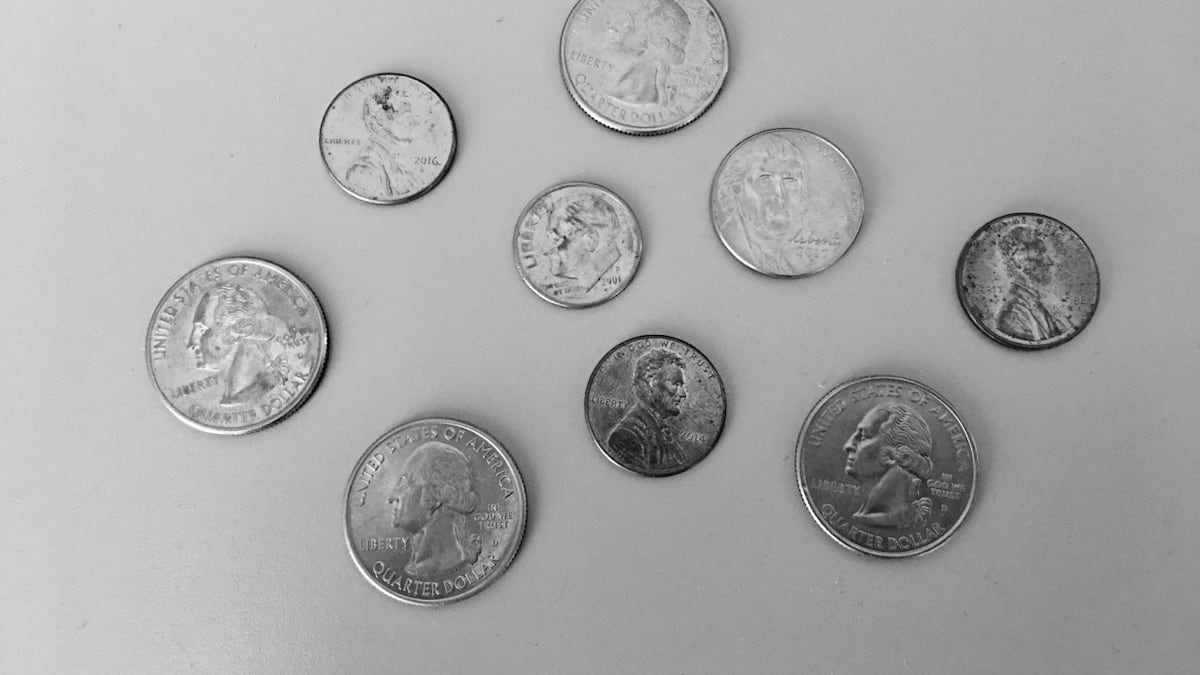

In [13]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# URL of the image
url = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'

# Download the image from the URL
resp = urllib.request.urlopen(url)
image_data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [14]:
# Compute the image derivative in the x-direction
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)

# Compute the image derivative in the y-direction
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

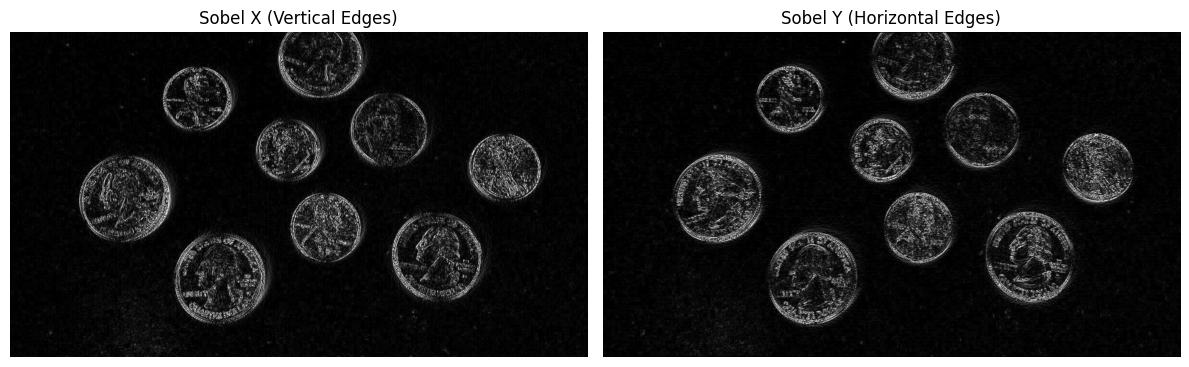

In [15]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot Sobel X (Vertical Edges)
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(np.absolute(sobel_x)), cmap='gray')
plt.title('Sobel X (Vertical Edges)')
plt.axis('off')

# Plot Sobel Y (Horizontal Edges)
plt.subplot(1, 2, 2)
plt.imshow(np.uint8(np.absolute(sobel_y)), cmap='gray')
plt.title('Sobel Y (Horizontal Edges)')
plt.axis('off')

plt.tight_layout()
plt.show()


#I notice below that the Sobol X shows more of the edges along the left and right sides of the coins while sobol Y shows more of the edges at the top and bottom of the coins.

In [16]:
#
# Calculate the image derivatives in x- and y-direction using manually designed sobel kernels and the cv.filter2D method
#


# Define manually designed Sobel kernels

sobel_kernel_x = np.array([[-1,  0,  1],
                           [-2,  0,  2],
                           [-1,  0,  1]], dtype=np.float32)

sobel_kernel_y = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]], dtype=np.float32)


# Calculate the image derivatives using cv2.filter2D
sobel_x_manual = cv2.filter2D(gray_img, cv2.CV_64F, sobel_kernel_x)
sobel_y_manual = cv2.filter2D(gray_img, cv2.CV_64F, sobel_kernel_y)

# For visualization, take the absolute value and convert to 8-bit unsigned integers
sobel_x_display = np.uint8(np.absolute(sobel_x_manual))
sobel_y_display = np.uint8(np.absolute(sobel_y_manual))

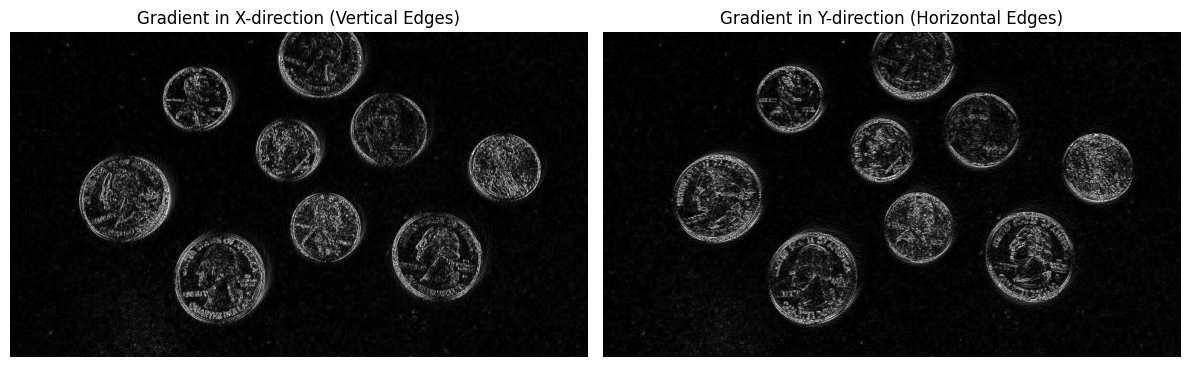

In [17]:
plt.figure(figsize=(12, 6))

# Plot the gradient in the x-direction (vertical edges)
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(np.absolute(sobel_x_display)), cmap='gray')
plt.title('Gradient in X-direction (Vertical Edges)')
plt.axis('off')

# Plot the gradient in the y-direction (horizontal edges)
plt.subplot(1, 2, 2)
plt.imshow(np.uint8(np.absolute(sobel_y_display)), cmap='gray')
plt.title('Gradient in Y-direction (Horizontal Edges)')
plt.axis('off')

plt.tight_layout()
plt.show()

Mathematically, the goal of the filters $S_x$ and $S_y$ is to approximate the derivatives of the image with respect to the horizontal and vertical directions respectively, such that
\begin{equation*}
\nabla I_x(x,y) = (I*S_x)[x,y]
\quad\mathrm{and}\quad
\nabla I_y(x,y) = (I*S_y)[x,y]
\end{equation*}

Therefore, the gradient of an image at each point is a 2D vector
\begin{equation*}
\nabla I =
\begin{bmatrix}
\nabla I_x\\
\nabla I_y
\end{bmatrix}
\end{equation*}

This vector can be computed for every pixel. Its magnitude and phase (i.e. angle)  can be computed as
\begin{equation*}
|| \nabla I || = \sqrt{(\nabla I_x)^2 + (\nabla I_y)^2} \\
\angle \nabla I = atan2(\nabla I_x, \nabla I_y)
\end{equation*}

$\it{Note:}$ we use atan2() instead of atan() to be able to determine the right quadrant of the phase.


**Exercise 1.2**
* Using the previously computed image gradients and the above formula compute the gradient magnitude and gradient phase. You can use the numpy functions `np.sqrt', `np.power` and `np.arctan2`.

* Visualize the **gradient magnitude** and **phase** images along with the **original image**. Plot all three images in a single row using the subplot function. Where does the gradient have high magnitude? How does the phase change along the coin border?



In [18]:
#
#  Use this cell to calculate the magnitute and angle of the gradients calculated in exercise 1
#


# Compute the gradient magnitude and angle
magnitude, angle = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)

# Scale the magnitude to the 0-255 range and convert to 8-bit
magnitude_display = np.uint8(255 * magnitude / np.max(magnitude))

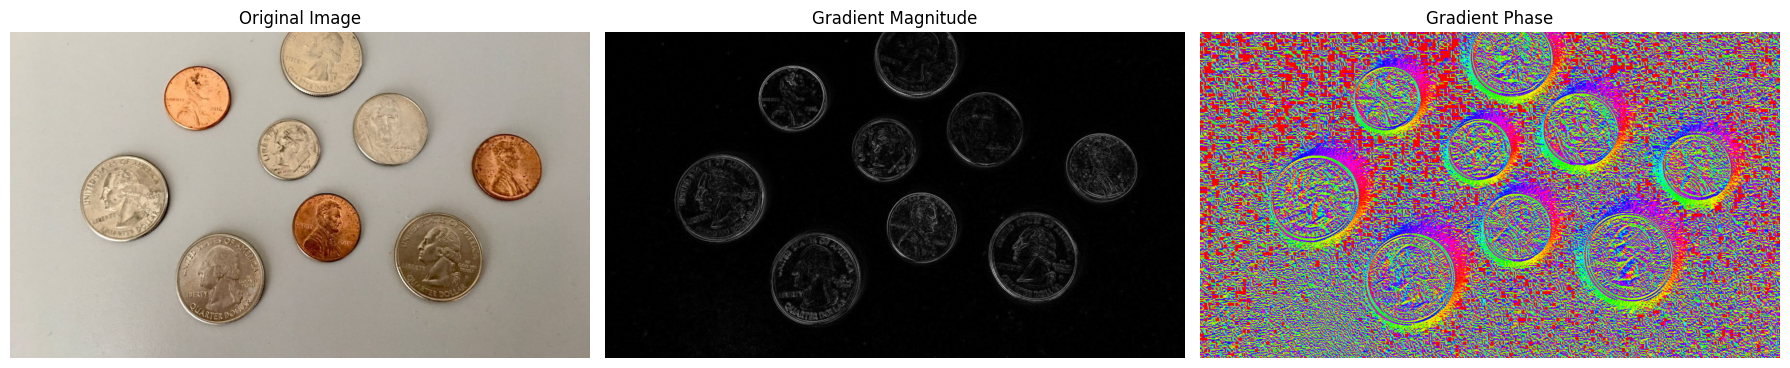

In [19]:
#
# Visualize the gradient magnitute, phase and original image.
#

# Create a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Display the original image (convert from BGR to RGB for correct colors)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_display, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(angle, cmap='hsv')
plt.title("Gradient Phase")
plt.axis('off')

plt.tight_layout()
plt.show()

# Where does the gradient have high magnitude? Along the edges of the coins
# How does the phase change along the coin border? The entire color spectrum can be seen along the border.

**Respond to the questions** : Where does the gradient have high magnitude? How does the phase change along the coin border?

Your Response here:

## Exercise 2 Laplacian of Gaussian opertator

An alternative way to detect image is to use the Laplacian operator. The opertor is calculated as the sum of the second partial derivatives along the x and y axis. To reduce the noise in the image, it is important that you first filter the image using a gaussian filter.  The operator is defined for an image f as:

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

The operator is implemented in the openCV libary in the function `cv.Laplacian`

**Execise 2.1**
* Load an image, apply a graussina filter to reduce the noise (i.e. using the cv.GaussianBlur functions) and apply the laplacian operator.

* Visualize the origianl image and the Laplacian.

You can use the following tutorial as a [reference](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html).


In [22]:
#
# Load, filter, and generate the laplacian of the input image.
#

# Apply a Gaussian blur with a 3x3 kernel with sigma=0
gaussian_blur = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Take the absolute value and convert to 8-bit for display
laplacian_display = np.uint8(np.absolute(laplacian))

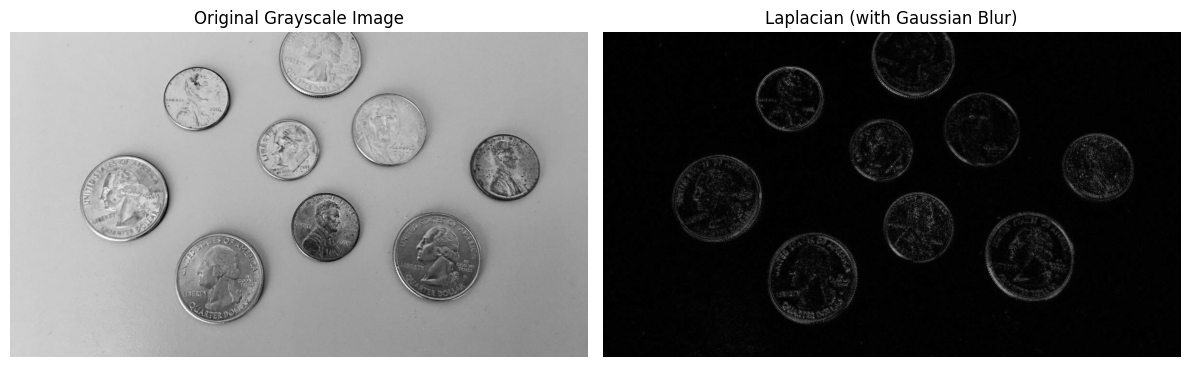

In [23]:
# Visualize the original grayscale image and the Laplacian result side by side using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_display, cmap='gray')
plt.title("Laplacian (with Gaussian Blur)")
plt.axis('off')

plt.tight_layout()
plt.show()

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.